Clustering for EastWestAirlines

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
upload=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [35]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
df=df.drop(['ID#'], axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
df_norm = norm_func(df.iloc[:,:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


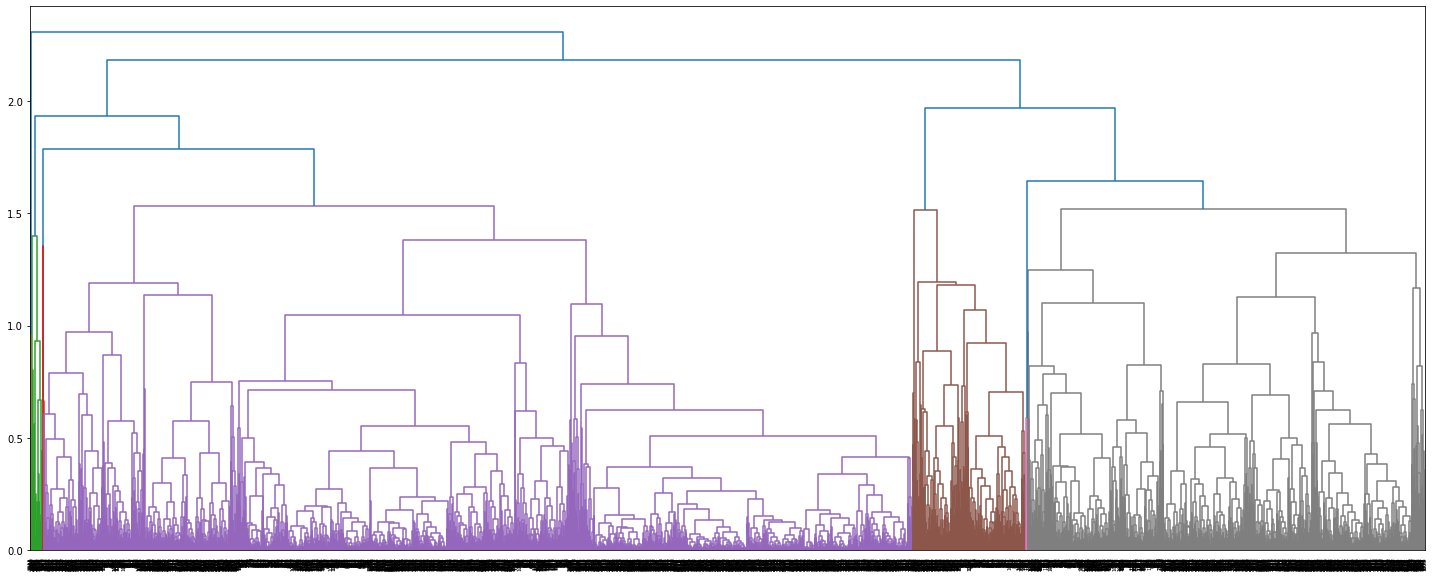

In [30]:
plt.figure(figsize=(25, 10)) 
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=5)

In [32]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [33]:
y_hc

array([1, 1, 1, ..., 0, 4, 4])

In [38]:
df['h_clusterid'] = y_hc

In [39]:
aln = df.sort_values('h_clusterid')
aln.iloc[:,[0,-1]]

,Balance,h_clusterid
2829,3965,0
676,26556,0
677,9601,0
1265,7210,0
2194,81251,0
...,...,...
3380,12568,4
3381,13188,4
1014,96827,4
3368,26069,4


In [40]:
y=pd.DataFrame(hc.fit_predict(df_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [41]:
df.iloc[[941]]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
941,3663,0,1,1,1,894,10,0,0,5916,1,0


In [42]:
df['clustersid']=hc.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,4


Airline (Kmeans)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [44]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [45]:
al = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
al

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_al_df = scaler.fit_transform(al.iloc[:,1:])

In [47]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [48]:
al_norm = norm_func(al.iloc[:,1:])


In [49]:
scaled_al_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [50]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_al_df)

In [51]:
predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [52]:
kmeans.inertia_

27446.372456681347

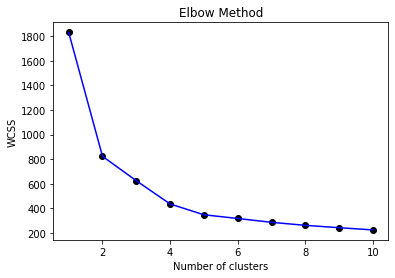

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(al_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,color='Blue')
plt.scatter(range(1, 11), wcss,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K = 4

In [54]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(al_norm)

KMeans(n_clusters=4, random_state=0)

In [55]:
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [56]:
al['clusterid_new'] = clusters_new.labels_

In [57]:
clusters_new.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.37681325e-02,  8.07125209e-03,  2.24748810e-02,
         8.98995241e-03,  1.05764146e-03,  1.25750315e-02,
         7.51540344e-02,  7.35667765e-03,  1.24322760e-02,
         4.34424062e-01,  8.32667268e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.92010150e-02,  7.21537510e-03,  6.40350877e-01,
         7.97448166e-04,  5.58213716e-03,  1.17843075e-01,
         2.00289307e-01,  7.30214826e-03,  1.19466763e-02,
         5.38787863e-01, -1.11022302e-16]])

In [58]:
al.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,1,2290.498678,40520.815442,89.978318,1.089900,1.017980,1.004231,3315.847171,6.463247,226.710735,0.658911,3605.113168,0.0
2,2,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,3,1819.309410,117976.519936,80.437002,3.561404,1.001595,1.022329,31073.451356,17.224880,225.030303,0.633174,4470.706539,0.0


In [59]:
al[["clusterid_new"]].value_counts()

clusterid_new
1                1891
2                 808
0                 673
3                 627
dtype: int64

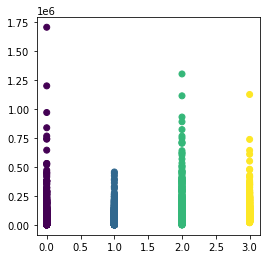

In [60]:
plt.figure(figsize=(4, 4))  
plt.scatter(al['clusterid_new'],al['Balance'], c=clusters_new.labels_) 
plt.show()

K = 5

In [61]:
clusters_new1 = KMeans(5, random_state=0)
clusters_new1.fit(al_norm)

KMeans(n_clusters=5, random_state=0)

In [62]:
clusters_new1.labels_

array([4, 4, 4, ..., 0, 1, 1], dtype=int32)

In [63]:
al['clusterid_new1'] = clusters_new1.labels_

In [64]:
clusters_new1.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [65]:
al[["clusterid_new1"]].value_counts()

clusterid_new1
1                 1032
4                  868
0                  808
3                  673
2                  618
dtype: int64

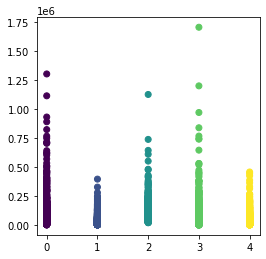

In [66]:
plt.figure(figsize=(4, 4))  
plt.scatter(al['clusterid_new1'],al['Balance'], c=clusters_new1.labels_) 
plt.show()

Airline (DBSCAN)

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [69]:
al = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
al

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [70]:
al1=al.drop(['ID#'], axis=1)
al1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [71]:
array=al1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [72]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [73]:
dbscan = DBSCAN(eps=3, min_samples=6)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [76]:
clustered = pd.concat([al1,cl],axis=1)

In [77]:
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
126,602064,0,5,1,1,194753,26,2250,10,7652,1,-1
151,930410,0,5,1,1,211284,18,2250,6,7640,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,-1
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,-1
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,-1
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1


In [78]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [79]:
clustered.sort_values('cluster')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
531,98472,1776,5,1,1,124421,45,10250,28,6621,1,-1
630,415070,588,5,1,1,153183,41,3802,20,6423,1,-1
190,123516,0,5,1,1,240544,31,500,2,7507,1,-1
2605,41152,10074,1,1,1,3250,19,0,0,2669,0,-1
1593,183370,0,1,1,1,30988,14,12988,9,4848,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3762,74531,0,1,2,1,10914,17,750,3,3456,1,2
1976,11961,0,1,2,1,11961,10,0,0,4646,0,2
2967,8210,0,1,2,1,9122,16,0,0,3312,1,2
2317,10458,0,1,2,1,10458,12,0,0,3726,0,2


In [80]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                 -0.001250
dtype: float64

In [81]:
clustered['cluster'].value_counts()

 0    3893
-1      68
 2      25
 1      13
Name: cluster, dtype: int64

# **Crime_data**(Hierarchical)

In [82]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [83]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [84]:
cd1 = pd.read_csv("crime_data.csv")
cd1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [85]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [86]:
df_norm = norm_func(cd1.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


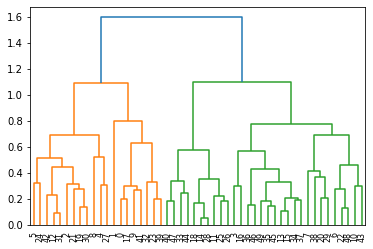

In [87]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [88]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [89]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [90]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [91]:
cd1['h_clusterid'] = y_hc

In [92]:
cdn = cd1.sort_values('h_clusterid')
cdn.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
0,Alabama,0
17,Louisiana,0
23,Mississippi,0
32,North Carolina,0
39,South Carolina,0
9,Georgia,0
1,Alaska,0
41,Tennessee,0
43,Utah,1
38,Rhode Island,1


In [93]:
y=pd.DataFrame(hc.fit_predict(df_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    20
3    12
2    10
0     8
Name: clustersid, dtype: int64

crimedata (Kmeans)

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [95]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


In [96]:
cd = pd.read_csv("crime_data.csv")
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cd_df = scaler.fit_transform(cd.iloc[:,1:])

In [98]:
scaled_cd_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [99]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_cd_df)

In [100]:
predict

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [101]:
kmeans.inertia_

57.55425863091105

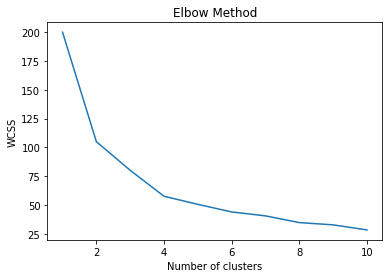

In [102]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_cd_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_cd_df)

KMeans(n_clusters=4, random_state=0)

In [104]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [105]:
cd['clusterid_new'] = clusters_new.labels_

In [106]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [107]:
cd.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [108]:
cd[["clusterid_new"]].value_counts()

clusterid_new
0                16
1                13
2                13
3                 8
dtype: int64

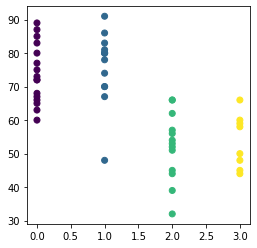

In [109]:
plt.figure(figsize = (4, 4))
plt.scatter(cd['clusterid_new'], cd['UrbanPop'], c=clusters_new.labels_)

crimedata (DBSCAN)

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (2).csv


In [112]:
cd = pd.read_csv("crime_data.csv")
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [113]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [114]:
cd1 = cd.drop(["Unnamed: 0"], axis=1)
cd1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [115]:
array=cd1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [116]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [117]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit_predict(X)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [118]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [119]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [120]:
clustered = pd.concat([cd1,cl],axis=1)

In [121]:
clustered[clustered['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
10,5.3,46,83,20.2,-1
12,10.4,249,83,24.0,-1


In [122]:
clustered

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [123]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster       0.200
dtype: float64

In [124]:
clustered['cluster'].value_counts()

 1    28
-1    18
 0     4
Name: cluster, dtype: int64

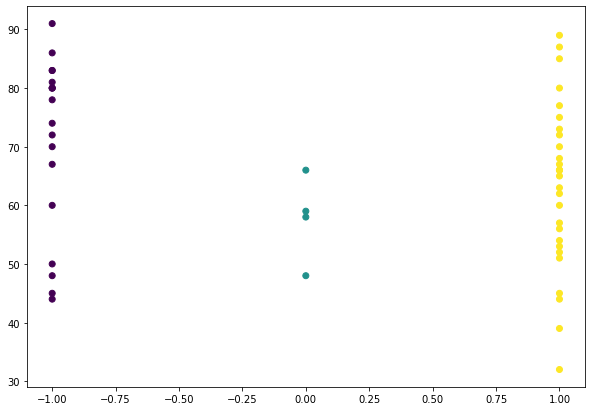

In [125]:
plt.figure(figsize=(10, 7))  
plt.scatter(clustered['cluster'],clustered['UrbanPop'], c=dbscan.labels_) 